# Demo to show the time-domain signal and the Mel spectrogram of an adversarial audio and its perturbations, as well as the effects of denoising and noise-adding methods 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
import librosa
import librosa.display
from noise_adding import add_noise 
from denoising import denoise 
from scipy.io.wavfile import write

def plot_time_domain_waveform(audio, Fs, title, file_name):    
    t_wav = np.arange(audio.shape[0]) / Fs 
    print ("Fs = %d, audio signal length = %d" % (Fs, audio.shape[0]))
    
    plt.plot(t_wav, audio, color='r')
    plt.xlim(t_wav[0], t_wav[-1])
    plt.title(title)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()

def plot_mel_spectrogram(audio, Fs, n_fft, hop_length, win_length,
                         n_mels, specmin, specmax, title, file_name):
    mel_spec = librosa.feature.melspectrogram(audio, 
                                              sr=Fs, 
                                              n_fft=n_fft, 
                                              hop_length=hop_length,
                                              win_length=win_length,
                                              n_mels=n_mels)
    log_mel_spec = librosa.power_to_db(mel_spec)
    librosa.display.specshow(log_mel_spec, x_axis='time',
                             y_axis='mel', sr=Fs,
                             hop_length=hop_length,
                             cmap='coolwarm',
                             vmin=specmin, vmax=specmax)
    
    plt.xlabel('Time (seconds)',fontsize=12)
    plt.ylabel('Frequency (Hz)',fontsize=12)
    
    cbar = plt.colorbar(format='%+2.f dB')
    cbar.set_label(label='Magnitude (dB)',size=12)
    cbar.ax.tick_params(labelsize=12)
    plt.tick_params(labelsize=12)
    plt.title(title, fontsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()
    

Original clean audio:

In [2]:
org_audio_path = '237-126133-0017-att-org.wav'
IPython.display.Audio(org_audio_path)

Adversarial audio generated by the FakeBob attack with $\epsilon = 0.002$ against the GMM SV system:

In [3]:
adv_audio_path = '237-126133-0017-att-adv.wav'
IPython.display.Audio(adv_audio_path)

# Time domain waveforms

Fs = 16000, audio signal length = 99360


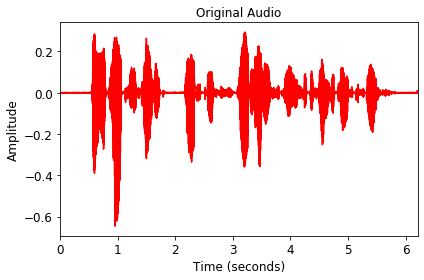

In [4]:
org_audio, Fs = librosa.load(org_audio_path, sr = 16000)
plot_time_domain_waveform(org_audio, Fs, "Original Audio", 
                          "./figs/time_waveform_org_audio.png")

Fs = 16000, audio signal length = 99360


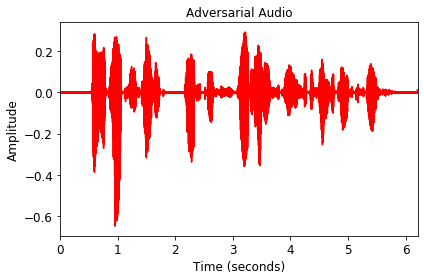

In [5]:
adv_audio, Fs = librosa.load(adv_audio_path, sr = 16000)
plot_time_domain_waveform(adv_audio, Fs, "Adversarial Audio", 
                          "./figs/time_waveform_adv_audio.png")

Fs = 16000, audio signal length = 99360


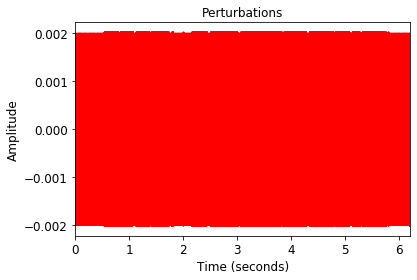

mean = 0.000001, std = 0.001756


In [6]:
perturbations = adv_audio - org_audio
plot_time_domain_waveform(perturbations, Fs, 
                          "Perturbations", 
                          "./figs/time_waveform_perturbations.png")
print("mean = %f, std = %f" % (np.mean(perturbations), np.std(perturbations)))

# Mel Spectrograms
Note: the sample frequency is 16000 Hz. The range of frequency is between 0 and 8000 Hz. 

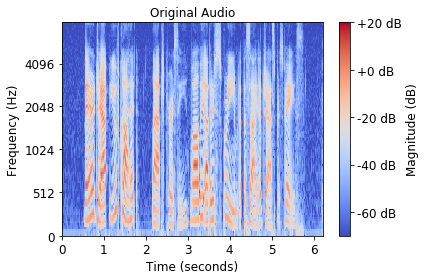

In [7]:
plot_mel_spectrogram(org_audio, Fs=16000, n_fft = 512, 
                     hop_length = 160, win_length = 400, 
                     n_mels = 128, 
                     specmin = -70, specmax = 20, 
                     title = "Original Audio", 
                     file_name = "./figs/mel_spectrogram_org_audio.png")

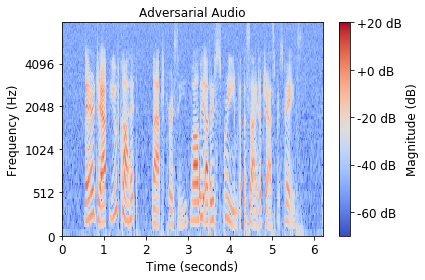

In [8]:
plot_mel_spectrogram(adv_audio, Fs=16000, n_fft = 512, 
                     hop_length = 160, win_length = 400, 
                     n_mels = 128, 
                     specmin = -70, specmax = 20, 
                     title = "Adversarial Audio", 
                     file_name = "./figs/mel_spectrogram_adv_audio.png")

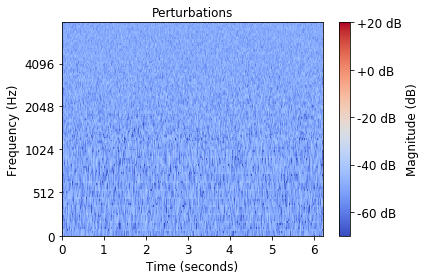

In [9]:
plot_mel_spectrogram(perturbations, Fs=16000, n_fft = 512, 
                     hop_length = 160, win_length = 400,
                     n_mels = 128, 
                     specmin = -70, specmax = 20, 
                     title = "Perturbations", 
                     file_name = "./figs/mel_spectrogram_perturbations.png")

# Denoising method on adversarial audio

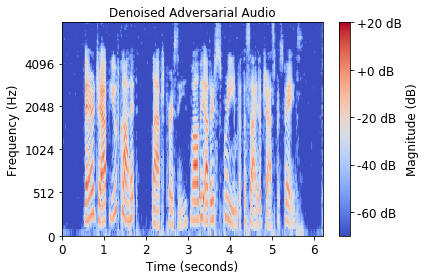

In [10]:
denoised_audio = denoise(adv_audio, 0.002)
plot_mel_spectrogram(denoised_audio, Fs=16000, n_fft = 512, 
                     hop_length = 160, win_length = 400, 
                     n_mels = 128, 
                     specmin = -70, specmax = 20, 
                     title = "Denoised Adversarial Audio", 
                     file_name = "./figs/mel_spectrogram_denoised_adv_audio.png")

denoised_audio = np.array(denoised_audio * (2**15), dtype=np.int16)
denoised_audio_path = '237-126133-0017-att-denoised.wav'
write(denoised_audio_path, Fs, denoised_audio)

IPython.display.Audio(denoised_audio_path)

# Noise-adding method on adversarial audio

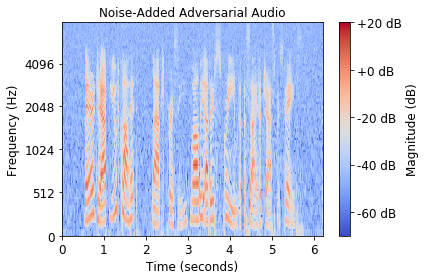

In [11]:
noise_added_audio = add_noise(adv_audio, 0.002)
plot_mel_spectrogram(noise_added_audio, Fs=16000, n_fft = 512, 
                     hop_length = 160, win_length = 400, 
                     n_mels = 128, 
                     specmin = -70, specmax = 20, 
                     title = "Noise-Added Adversarial Audio", 
                     file_name = "./figs/mel_spectrogram_noise-added_adv_audio.png")

noise_added_audio = np.array(noise_added_audio * (2**15), dtype=np.int16)
noise_added_audio_path = '237-126133-0017-att-noise-added.wav'
write(noise_added_audio_path, Fs, noise_added_audio)

IPython.display.Audio(noise_added_audio_path)